Author: Saurav Akhouri

Email: sauravakhouri02@gmail.com

## Importing Libraries

In [258]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [259]:
WineData=pd.read_csv('QualityPrediction.csv')
WineData

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## Finding Missing Values

In [260]:
pd.set_option('display.max_rows',20)

WineData.isnull().sum()

#there are no  missing values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Finding Duplicates

In [261]:
# pd.set_option('display.max_rows',10)
WineData[WineData.duplicated()]


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


## Removing Duplicates

In [262]:
WineData.drop_duplicates(keep='first',inplace=True)

WineData.shape

(1359, 12)

In [263]:
WineData.duplicated().sum()

0

## Exploratory Data Analysis

### Checking the datatype

In [264]:
WineData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


### Correlation

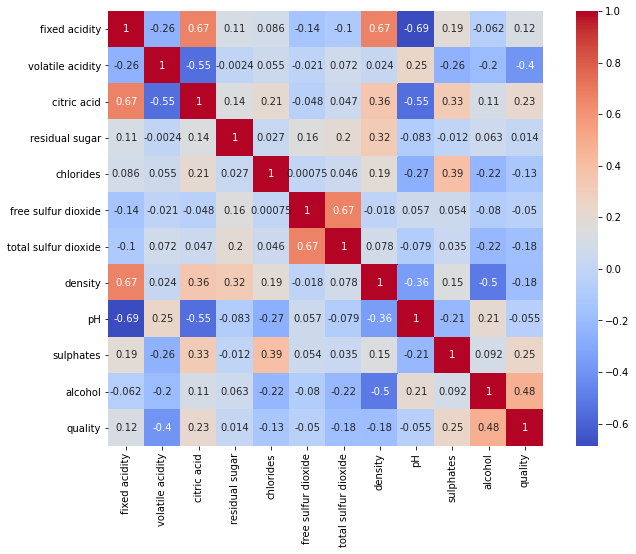

In [265]:
plt.subplots(figsize=(12,8))
sns.heatmap(WineData.corr(),annot=True, square=True,cmap='coolwarm')


# we don't see a very drastic correlation between  target and independent variable


In [266]:
# sorting the independent variables as per their correlation with wine quality 

correlation=WineData.corr()
correlation['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.480343
sulphates               0.248835
citric acid             0.228057
fixed acidity           0.119024
residual sugar          0.013640
free sulfur dioxide    -0.050463
pH                     -0.055245
chlorides              -0.130988
total sulfur dioxide   -0.177855
density                -0.184252
volatile acidity       -0.395214
Name: quality, dtype: float64

### Checking the Mean of Data

In [267]:
pd.set_option('display.max_rows',20)

WineData.mean()

fixed acidity            8.310596
volatile acidity         0.529478
citric acid              0.272333
residual sugar           2.523400
chlorides                0.088124
free sulfur dioxide     15.893304
total sulfur dioxide    46.825975
density                  0.996709
pH                       3.309787
sulphates                0.658705
alcohol                 10.432315
quality                  5.623252
dtype: float64

### Distribution Plot

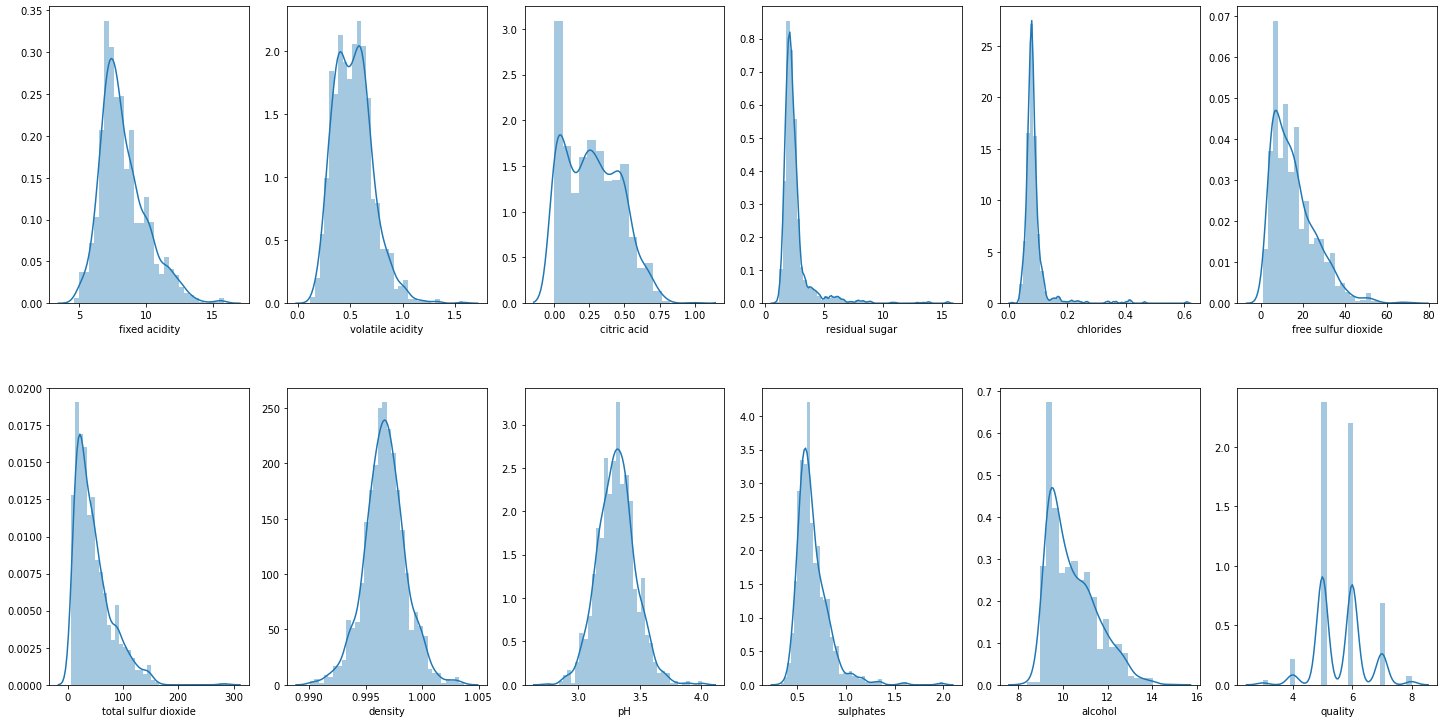

In [268]:
fig,ax=plt.subplots(ncols=6,nrows=2,figsize=(20,10))
index=0
ax=ax.flatten()

for col,value in WineData.items():
    sns.distplot(value,ax=ax[index])
    index+=1

plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

# using the histogram we can see that we have some columns that are skewed and some normally distributed fileds as well

## Finding and Removing Outliers

#### Box Plot

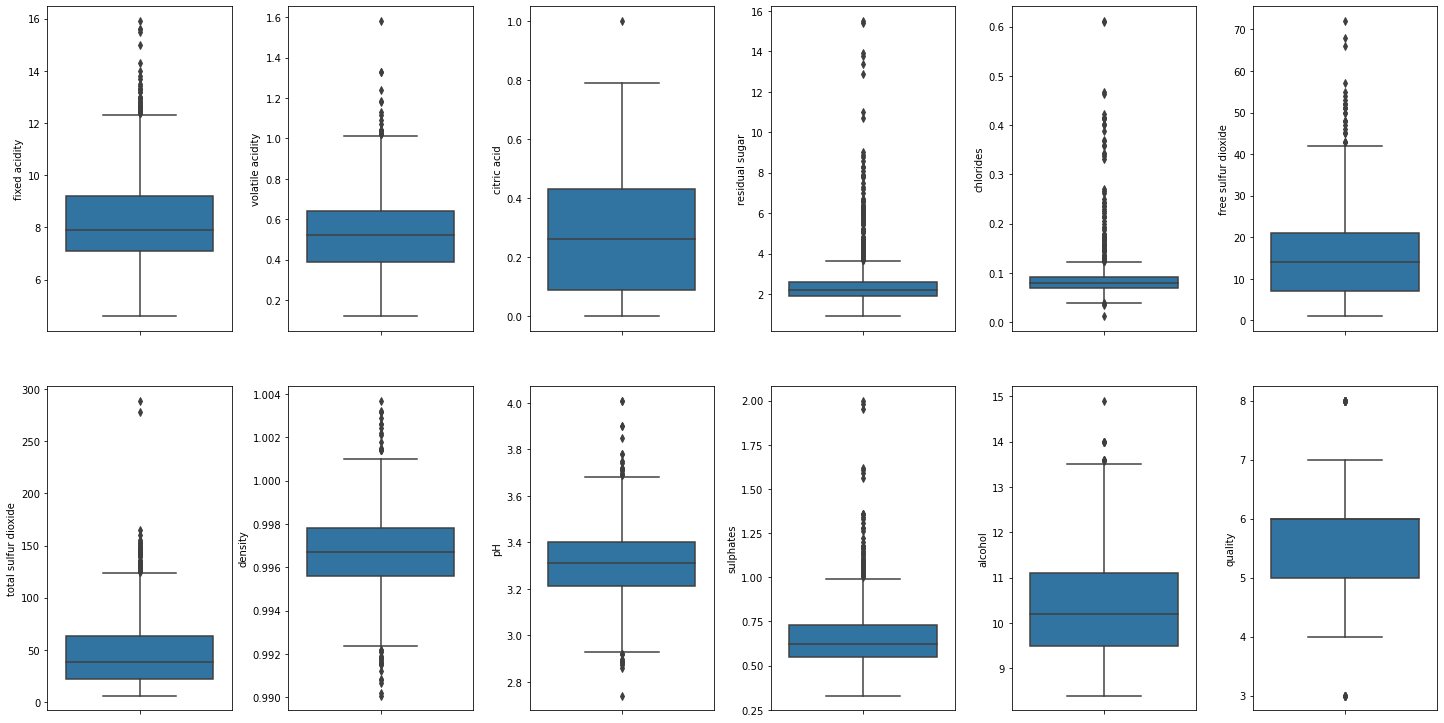

In [269]:
fig,ax=plt.subplots(ncols=6,nrows=2,figsize=(20,10))
index=0
ax=ax.flatten()

for col,value in WineData.items(): 
    sns.boxplot(y=col,data=WineData,ax=ax[index])
    index+=1

plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

#using the box plot we can see that there are outliers in the data

### Removing outliers 

In [270]:
#defining a function to identify the upper and lower range for outliers i.e +- 1.5 IQR 

def OutlierRange(Feature):
    Q1=np.percentile(Feature,[25], interpolation='midpoint',)
    Q3=np.percentile(Feature,[75],interpolation='midpoint')
    IQR=Q3-Q1
    IQR1_5 = 1.5 * IQR
    Upper_Range = Q3+IQR1_5
    Lower_Range = Q1 - IQR1_5
    return Upper_Range, Lower_Range


In [271]:
# defining a function to drop the outliers from the respected fields

def DropOutlier(Feature,Upper_Range,Lower_Range):
    WineData.drop(WineData[Feature> Upper_Range[0]].index,axis=0,inplace=True)
    WineData.drop(WineData[Feature<Lower_Range[0]].index,axis=0,inplace=True)

In [272]:
WineData.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [273]:
for col,val in WineData.items():
    if col != 'quality':
        print(col)

fixed acidity
volatile acidity
citric acid
residual sugar
chlorides
free sulfur dioxide
total sulfur dioxide
density
pH
sulphates
alcohol


In [274]:
Feature=WineData['fixed acidity']

Upper_Range,Lower_Range=OutlierRange(Feature)
DropOutlier(Feature,Upper_Range,Lower_Range)


In [275]:
Feature=WineData['volatile acidity']

Upper_Range,Lower_Range=OutlierRange(Feature)
DropOutlier(Feature,Upper_Range,Lower_Range)

In [276]:
Feature=WineData['citric acid']

Upper_Range,Lower_Range=OutlierRange(Feature)
DropOutlier(Feature,Upper_Range,Lower_Range)

In [277]:
Feature=WineData['residual sugar']
Upper_Range,Lower_Range=OutlierRange(Feature)
DropOutlier(Feature,Upper_Range,Lower_Range)

In [278]:
Feature=WineData['chlorides']
Upper_Range,Lower_Range=OutlierRange(Feature)
DropOutlier(Feature,Upper_Range,Lower_Range)

In [279]:
Feature=WineData['free sulfur dioxide']

Upper_Range,Lower_Range=OutlierRange(Feature)
DropOutlier(Feature,Upper_Range,Lower_Range)


In [280]:
Feature=WineData['total sulfur dioxide']
Upper_Range,Lower_Range=OutlierRange(Feature)
DropOutlier(Feature,Upper_Range,Lower_Range)

In [281]:
Feature=WineData['density']
Upper_Range,Lower_Range=OutlierRange(Feature)
DropOutlier(Feature,Upper_Range,Lower_Range)

In [282]:
Feature=WineData['pH']
Upper_Range,Lower_Range=OutlierRange(Feature)
DropOutlier(Feature,Upper_Range,Lower_Range)

In [283]:
Feature=WineData['sulphates']
Upper_Range,Lower_Range=OutlierRange(Feature)
DropOutlier(Feature,Upper_Range,Lower_Range)

In [284]:
Feature=WineData['alcohol']
Upper_Range,Lower_Range=OutlierRange(Feature)
DropOutlier(Feature,Upper_Range,Lower_Range)

### Boxplots after removing Outliers

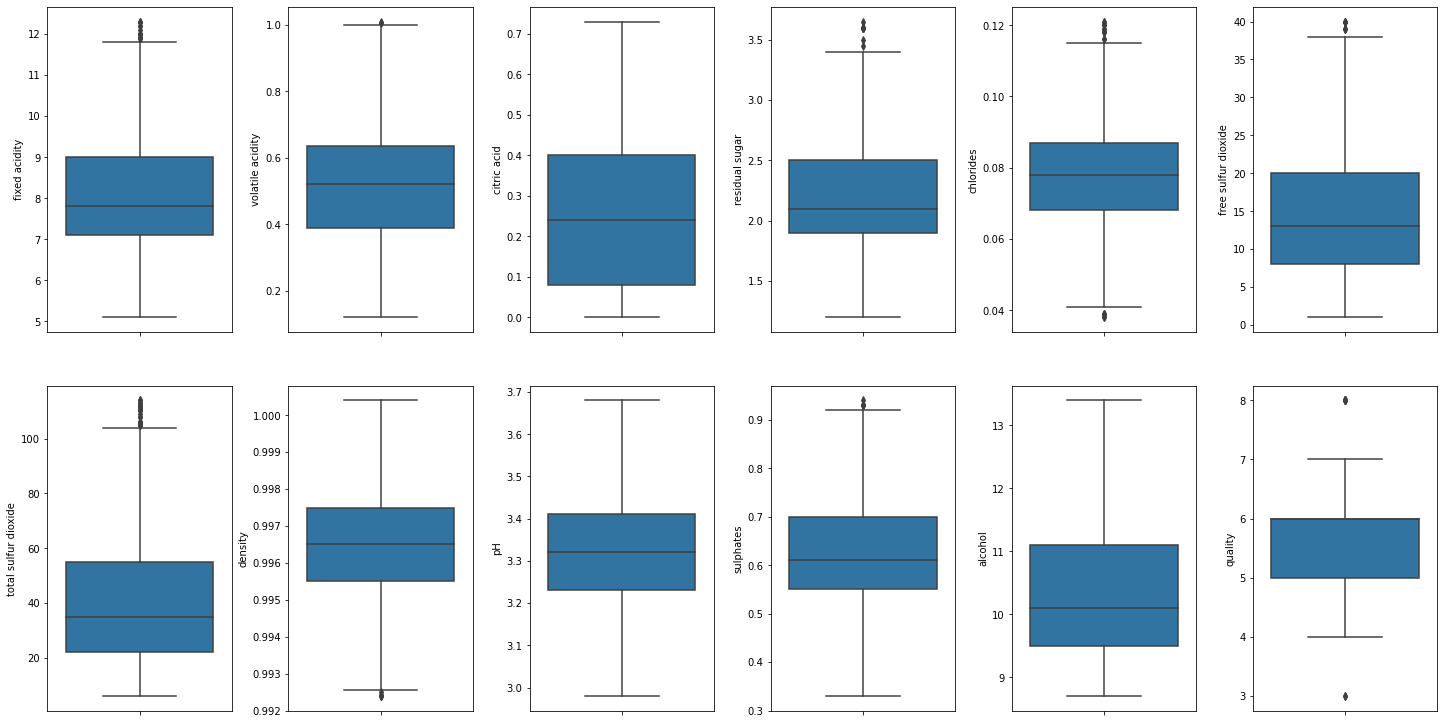

In [285]:
fig,ax=plt.subplots(ncols=6,nrows=2,figsize=(20,10))
index=0
ax=ax.flatten()

for col,value in WineData.items(): 
    sns.boxplot(y=col,data=WineData,ax=ax[index])
    index+=1

plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

### Checking how the samples for each category of quality is taken

In [286]:
WineData['quality'].value_counts()

5    415
6    411
7    116
4     32
8      9
3      2
Name: quality, dtype: int64

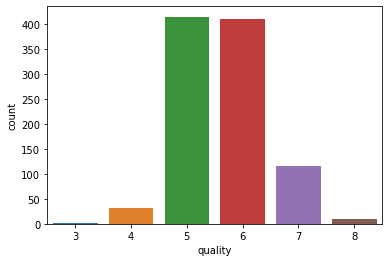

In [287]:
sns.countplot(WineData['quality'])
plt.show()

# the data in quality field is in range of 3 to 8

# Also this shows most of the samples are for the quality 5,6,7 hence there is a class imbalance

# Hence we will need to balance the class with oversampling


## Splitting Data into X and Y variables

In [288]:
X=WineData.drop(['quality','pH','residual sugar','density'],axis=1)
Y=WineData['quality']

In [289]:
Y.shape

(985,)

## Balancing the class by over sampling

In [290]:
Y.value_counts()

5    415
6    411
7    116
4     32
8      9
3      2
Name: quality, dtype: int64

In [291]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=1)
# transform the dataset
X, Y = oversample.fit_resample(X, Y)


In [292]:
Y.value_counts()

7    415
5    415
3    415
8    415
6    415
4    415
Name: quality, dtype: int64

## Splitting Data into Train and Test Split

In [293]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

## Feature Scaling

In [294]:
from sklearn.preprocessing import StandardScaler

StandardScaler=StandardScaler()
X_train=StandardScaler.fit_transform(X_train)
X_test=StandardScaler.transform(X_test)

## Model Training

In [295]:
#creating a function to pass different Classification models and then choose the best

from sklearn.model_selection import cross_val_score

def Classifier(model,X_train,Y_train,X_test,Y_test):
    model.fit(X_train,Y_train)
    Y_pred=model.predict(X_test)
    model_trainscore=model.score(X_train,Y_train)
    model_testscore=model.score(X_test,Y_test)
    print('Training Score: ',model_trainscore)
    print('Test Score: ',model_testscore)
    
    #Classification Report
    print('\nAccuracy: ',metrics.accuracy_score(Y_test,Y_pred,normalize=True))
    print('Precision: ',metrics.precision_score(Y_test,Y_pred,average='macro') )
    print('Recall: ', metrics.recall_score(Y_test,Y_pred,average='macro'))
    print('F1-Score: ', metrics.f1_score(Y_test,Y_pred,average='macro'))
    
        # cross validation
    score=cross_val_score(model,X_train,Y_train,cv=10)
    print('\nCross Validation Score: ',np.mean(score)*100)
    

### Logistic Regression

In [296]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=5)
Classifier(model, X_train, Y_train,X_test,Y_test)

# not so good as it is a multiclass

Training Score:  0.6275100401606426
Test Score:  0.5943775100401606

Accuracy:  0.5943775100401606
Precision:  0.587211443880347
Recall:  0.6088182099426477
F1-Score:  0.5902840897285896

Cross Validation Score:  61.74849246231157


### Decision Tree Classifier

In [297]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=5,max_depth=8)
Classifier(model, X_train, Y_train,X_test,Y_test)

Training Score:  0.8488955823293173
Test Score:  0.7088353413654619

Accuracy:  0.7088353413654619
Precision:  0.7020608558108558
Recall:  0.7238320395254183
F1-Score:  0.7080816809347552

Cross Validation Score:  74.64773869346735


### Random Forest Classifier

In [298]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=5)
Classifier(model, X_train, Y_train,X_test,Y_test)

# random forest though gives a high accuracy but it's overfitting as Training score is perfect however test score is not

Training Score:  1.0
Test Score:  0.8132530120481928

Accuracy:  0.8132530120481928
Precision:  0.8150408196774553
Recall:  0.8216963076714574
F1-Score:  0.8177931366918215

Cross Validation Score:  84.03567839195979


### K-Nearest Neighbour Classifier

In [299]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
Classifier(model, X_train, Y_train,X_test,Y_test)


Training Score:  0.8509036144578314
Test Score:  0.7931726907630522

Accuracy:  0.7931726907630522
Precision:  0.7793167073351978
Recall:  0.8020553448765813
F1-Score:  0.7838298390931775

Cross Validation Score:  78.46482412060303


In [300]:
# We'll try some preprocessing steps after model assessment to see how it affects the model accuracy

# feature scaling does not have much affect on the accuracy of any of the model
# the model improves tremendously by balancing the class trhough over sampling
# the model accuracy improved a bit more after removing the outlier 

In [301]:
# Out of all the models, Random Forest is performing the best hence we go forward with Randomn Forest


### Choosing Random Forest (As it gives the highest accuracy amongst other classifiers)

avoiding overfitting and trying to maintain accuracy with hyperparameter tuning

####  Hyperparameter Tuning (Manual)

Trying to resolve the overfitting issue by maintaining or imporving the accuracy

In [302]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=5,n_estimators=100,max_leaf_nodes=40,max_depth=7)

rf.fit(X_train,Y_train)
rf_trainscore=rf.score(X_train,Y_train)
rf_testscore=rf.score(X_test,Y_test)

Y_pred=rf.predict(X_test)
Y_pred_train= rf.predict(X_train)

print('Training Score: ',rf_trainscore)
print('Test Score: ',rf_testscore)


print('\nAccuracy: ',metrics.accuracy_score(Y_test,Y_pred,normalize=True))
print('Precision: ',metrics.precision_score(Y_test,Y_pred,average='macro') )
print('Recall: ', metrics.recall_score(Y_test,Y_pred,average='macro'))
print('F1-Score: ', metrics.f1_score(Y_test,Y_pred,average='macro'))
    
# cross validation
score=cross_val_score(model,X_train,Y_train,cv=10)
print('\nCross Validation Score: ',np.mean(score)*100)

Training Score:  0.838855421686747
Test Score:  0.748995983935743

Accuracy:  0.748995983935743
Precision:  0.7496623153813662
Recall:  0.761483703370848
F1-Score:  0.7539138112401816

Cross Validation Score:  78.46482412060303


In [303]:
from sklearn.metrics import mean_squared_error
print('MSE Train: ',mean_squared_error(Y_train,Y_pred_train))
print('MSE Test: ',mean_squared_error(Y_test,Y_pred))

MSE Train:  0.21987951807228914
MSE Test:  0.3453815261044177


## Feature Importance (Feature Selection) for Random forest

In [253]:
features=list(WineData.columns)
X_features=features[:-1]
print(X_features)


['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [82]:
def variable_importance(fit):
    importances=fit.feature_importances_
    indices=np.argsort(importances)[::-1]
    return {'importance':importances, 'index':indices}

In [255]:
var_imp_rf=variable_importance(rf)
importances_rf=var_imp_rf['importance']
indices_rf=var_imp_rf['index']

In [84]:
def print_var_importance(importances, indices,names_index):
    
    print("Feature Ranking")
    for f in range(0,indices.shape[0]):
        i=f
        print("{0}. The feature '{1}' has mean decrease in impurity of {2:.5}"
              .format(f+1, names_index[indices[i]],importances[indices[f]]))

In [85]:
print_var_importance(importances_rf,indices_rf,X_features)

Feature Ranking
1. The feature 'alcohol' has mean decrease in impurity of 0.19582
2. The feature 'sulphates' has mean decrease in impurity of 0.19486
3. The feature 'volatile acidity' has mean decrease in impurity of 0.16532
4. The feature 'citric acid' has mean decrease in impurity of 0.10465
5. The feature 'fixed acidity' has mean decrease in impurity of 0.067472
6. The feature 'total sulfur dioxide' has mean decrease in impurity of 0.058311
7. The feature 'chlorides' has mean decrease in impurity of 0.053782
8. The feature 'free sulfur dioxide' has mean decrease in impurity of 0.053041
9. The feature 'density' has mean decrease in impurity of 0.044546
10. The feature 'residual sugar' has mean decrease in impurity of 0.031185
11. The feature 'pH' has mean decrease in impurity of 0.031007


## HyperParameter Tuning Using Grid Search CV

In [ ]:

# parameters= {'max_depth':[2,4,6,7,8],
#             'bootstrap':[True,False],
#             'max_features':['auto','sqrt','log2',None],
#             'criterion':['gini','entropy'],
#             'n_estimators':[50,100,150,200],
#             'max_leaf_nodes': [20,30,40,50],
#             'min_samples_split':[2,3,4,5],
#             'min_samples_leaf': [1,2,3,4]

In [250]:
from sklearn.model_selection import GridSearchCV

parameters= {
            'max_depth':[7],
            'bootstrap':[True,False],
            'max_features':['auto','sqrt','log2',None],
            'criterion':['gini','entropy'],
            'n_estimators':[50,100],
            'max_leaf_nodes': [30,40,50],
            'min_samples_split':[2,3],
            'min_samples_leaf': [1,2]}

grid_search=GridSearchCV(estimator=rf,
                        param_grid=parameters,
                        cv=10,
                        scoring='accuracy',
                        n_jobs=-1)


grid_search=grid_search.fit(X_train,Y_train)

print('Best paramters using Grid Search: \n',grid_search.best_params_)
print('Accuracy using Grid Search: \n',grid_search.best_score_)

Best paramters using Grid Search: 
 {'bootstrap': False, 'criterion': 'gini', 'max_depth': 7, 'max_features': 'auto', 'max_leaf_nodes': 50, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy using Grid Search: 
 0.7987060301507538


#### Tuning based on Grid Search 

In [304]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=5,n_estimators=100,max_leaf_nodes=50,max_depth=7,bootstrap=False,
                          criterion='gini',min_samples_split=2,min_samples_leaf=1)

rf.fit(X_train,Y_train)
rf_trainscore=rf.score(X_train,Y_train)
rf_testscore=rf.score(X_test,Y_test)

Y_pred=rf.predict(X_test)
Y_pred_train= rf.predict(X_train)

print('Training Score: ',rf_trainscore)
print('Test Score: ',rf_testscore)


print('\nAccuracy: ',metrics.accuracy_score(Y_test,Y_pred,normalize=True))
print('Precision: ',metrics.precision_score(Y_test,Y_pred,average='macro') )
print('Recall: ', metrics.recall_score(Y_test,Y_pred,average='macro'))
print('F1-Score: ', metrics.f1_score(Y_test,Y_pred,average='macro'))
    
# cross validation
score=cross_val_score(rf,X_train,Y_train,cv=10)
print('\nCross Validation Score: ',np.mean(score)*100)

Training Score:  0.8649598393574297
Test Score:  0.7570281124497992

Accuracy:  0.7570281124497992
Precision:  0.7585374658851891
Recall:  0.7693735259665532
F1-Score:  0.7629774985518468

Cross Validation Score:  79.01557788944724


## Confusion Matrix (for Random Forest)

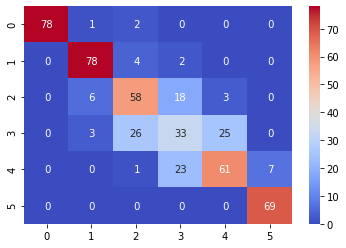

In [305]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(Y_test,Y_pred)
cf

sns.heatmap(cf,annot=True, fmt='2g',cmap='coolwarm')

## Selecting K-Nearest Neighbour (As the scores are closest to Random Forest)
We are selecting K-Neighbour as well, because the initial model is not overfitted but still gives result closer to Random Forest so we will try to do some hyper parameter tuning to find out if the score gets better than tuned Random Forest model

### Choosing the optimum value of K

In [306]:
accuracy_rate = []

# May take some time
for i in range(1,40):
    
    knn2 = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn2,X,Y,cv=10)
    accuracy_rate.append(score.mean())

In [307]:
error_rate = []

# May take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X,Y,cv=10)
    error_rate.append(1-score.mean())

Text(0, 0.5, 'Accuracy Rate')

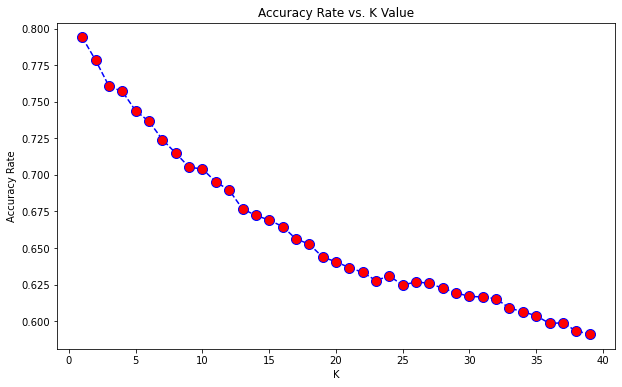

In [308]:
plt.figure(figsize=(10,6))
# plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
#         markerfacecolor='red', markersize=10)
# plt.title('Error Rate vs. K Value')
# plt.xlabel('K')
# plt.ylabel('Error Rate')

plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

## Hyper Parameter Tuning using Grid Search CV

In [244]:
from sklearn.model_selection import GridSearchCV

parameters2= {
            'n_neighbors':[1,2,3,4],
            'weights' : ['uniform', 'distance'],
            'p':[1,2],
            'leaf_size':[30,40],
            'weights':['uniform', 'distance'],
            'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_search=GridSearchCV(estimator=knn,
                        param_grid=parameters2,
                        cv=10,
                        scoring='accuracy',
                        n_jobs=-1)


grid_search=grid_search.fit(X_train,Y_train)

print('Best paramters using Grid Search: \n',grid_search.best_params_)
print('Accuracy using Grid Search: \n',grid_search.best_score_)

Best paramters using Grid Search: 
 {'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
Accuracy using Grid Search: 
 0.8263015075376885


#### Tuning based on grid search

In [309]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1,p=1)

knn.fit(X_train,Y_train)
knn_trainscore=knn.score(X_train,Y_train)
knn_testscore=knn.score(X_test,Y_test)

Y_pred=knn.predict(X_test)
Y_pred_train= knn.predict(X_train)

print('Training Score: ',knn_trainscore)
print('Test Score: ',knn_testscore)


print('\nAccuracy: ',metrics.accuracy_score(Y_test,Y_pred,normalize=True))
print('Precision: ',metrics.precision_score(Y_test,Y_pred,average='macro') )
print('Recall: ', metrics.recall_score(Y_test,Y_pred,average='macro'))
print('F1-Score: ', metrics.f1_score(Y_test,Y_pred,average='macro'))
    
# cross validation
score=cross_val_score(knn,X_train,Y_train,cv=10)
print('\nCross Validation Score: ',np.mean(score)*100)

Training Score:  1.0
Test Score:  0.8152610441767069

Accuracy:  0.8152610441767069
Precision:  0.8067885415200521
Recall:  0.8226526442661021
F1-Score:  0.8097394370836694

Cross Validation Score:  82.63065326633165


### Hyper Paramter tuning (Manual)

On placing the value of grid search CV we find out that the K-NN model moves towards an overfitting model, hence we will
take the value of k manually as 4 (as per the accuracy vs K-value graph) which gives the best result out of 1 to 5 neighbours 

In [310]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=4)

knn.fit(X_train,Y_train)
knn_trainscore=knn.score(X_train,Y_train)
knn_testscore=knn.score(X_test,Y_test)

Y_pred=knn.predict(X_test)
Y_pred_train= knn.predict(X_train)

print('Training Score: ',knn_trainscore)
print('Test Score: ',knn_testscore)


print('\nAccuracy: ',metrics.accuracy_score(Y_test,Y_pred,normalize=True))
print('Precision: ',metrics.precision_score(Y_test,Y_pred,average='macro') )
print('Recall: ', metrics.recall_score(Y_test,Y_pred,average='macro'))
print('F1-Score: ', metrics.f1_score(Y_test,Y_pred,average='macro'))
    
# cross validation
score=cross_val_score(knn,X_train,Y_train,cv=10)
print('\nCross Validation Score: ',np.mean(score)*100)

Training Score:  0.8684738955823293
Test Score:  0.8032128514056225

Accuracy:  0.8032128514056225
Precision:  0.7916589222936841
Recall:  0.8121436830604306
F1-Score:  0.793481414843633

Cross Validation Score:  79.46859296482411


### Confusion Matrix (for K-NN)

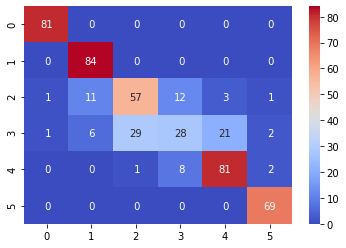

In [311]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(Y_test,Y_pred)
cf

sns.heatmap(cf,annot=True, fmt='2g',cmap='coolwarm')

#### We notice that K-NN has better accuracy,CV score as well as the classification metrics than Random Forest.
#### Hence we will go ahead with K-NN algorithm to predict the rating of the wine

###### Going ahead with one more approach to group the data into good and bad and check how the model accuracy changes
###### especially Logistic Regression

# Grouping the Wine Quality to Good and Bad categories

Here we group the Wine Quality in two categories, Good Quality >= 6 and Bad Quality <= 5 and then run the Classifier again

In [66]:
WineDataNew = WineData
WineDataNew.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


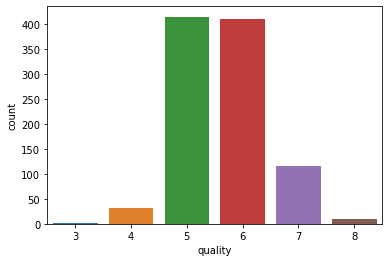

In [67]:
sns.countplot(WineData['quality'])
plt.show()

In [68]:
conditions=[(WineDataNew['quality']>=6),(WineDataNew['quality']<=5)]
rating=['Good','Bad']
WineDataNew['rating']=np.select(conditions,rating)
WineDataNew.rating.value_counts()

Good    536
Bad     449
Name: rating, dtype: int64

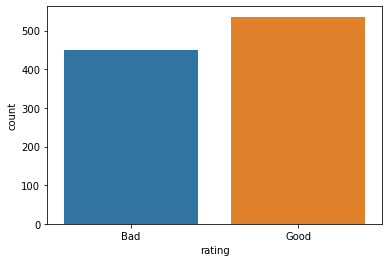

In [69]:
sns.countplot(WineDataNew.rating)

# no need for balancing by oversampling as for both the categories similar amount of sample and is fairly balanced

## Splitting Data into X and Y variables

In [70]:
XNew=WineDataNew.drop(['quality','rating'],axis=1)
YNew=WineDataNew['rating']

## Splitting Data into Train and Test Split

In [71]:
XNew_train,XNew_test,YNew_train,YNew_test=train_test_split(XNew,YNew,test_size=0.2,random_state=10)

In [72]:
## Feature Scaling

In [73]:
from sklearn.preprocessing import StandardScaler

StandardScaler=StandardScaler()
XNew_train=StandardScaler.fit_transform(XNew_train)
XNew_test=StandardScaler.transform(XNew_test)

## Model Training

#### Logistic Regression

In [74]:

modelnew = LogisticRegression(random_state=5)
Classifier(modelnew, XNew_train, YNew_train,XNew_test,YNew_test)

# logistic regression results imporves as it dichomotive class classifier

Training Score:  0.7411167512690355
Test Score:  0.7309644670050761

Accuracy:  0.7309644670050761
Precision:  0.7367820858386895
Recall:  0.738662486938349
F1-Score:  0.7308535044982343

Cross Validation Score:  73.99221032132425


#### Decision Tree

In [75]:

modelnew = DecisionTreeClassifier(random_state=5,max_depth=3)
Classifier(modelnew, XNew_train, YNew_train,XNew_test,YNew_test)

Training Score:  0.7652284263959391
Test Score:  0.6903553299492385

Accuracy:  0.6903553299492385
Precision:  0.6926728586171311
Recall:  0.6950888192267503
F1-Score:  0.6898438508194606

Cross Validation Score:  71.07919506653684


#### Random Forest

In [76]:

modelnew = RandomForestClassifier(random_state=5,n_estimators=100,max_leaf_nodes=20,max_depth=4,bootstrap=False,
                          criterion='entropy',min_samples_split=2,min_samples_leaf=2)
Classifier(modelnew, XNew_train, YNew_train,XNew_test,YNew_test)

Training Score:  0.7880710659898477
Test Score:  0.7055837563451777

Accuracy:  0.7055837563451777
Precision:  0.7103519668737059
Recall:  0.7123301985370951
F1-Score:  0.7053939768976898

Cross Validation Score:  73.86562804284324


#### K-Nearest Neighbour Classifier

In [77]:

modelnew = KNeighborsClassifier()
Classifier(modelnew, XNew_train, YNew_train,XNew_test,YNew_test)

Training Score:  0.8134517766497462
Test Score:  0.7055837563451777

Accuracy:  0.7055837563451777
Precision:  0.705885384456813
Recall:  0.7087251828631138
F1-Score:  0.7046629445822994

Cross Validation Score:  72.20545277507303


#### Choosing Logistic Regression

In [319]:

logrNew=LogisticRegression(random_state=5)

logrNew.fit(XNew_train,YNew_train)
logrNew_trainscore=logrNew.score(XNew_train,YNew_train)
logrNew_testscore=logrNew.score(XNew_test,YNew_test)

YNew_pred=logrNew.predict(XNew_test)


print('Training Score: ',logrNew_trainscore)
print('Test Score: ',logrNew_testscore)

Training Score:  0.7411167512690355
Test Score:  0.7309644670050761


### Classification Report

In [79]:
from sklearn.metrics import classification_report

cr=classification_report(YNew_test,YNew_pred)
print(cr)

              precision    recall  f1-score   support

         Bad       0.66      0.80      0.73        87
        Good       0.81      0.67      0.74       110

    accuracy                           0.73       197
   macro avg       0.74      0.74      0.73       197
weighted avg       0.75      0.73      0.73       197



### Confusion Matrix

In [80]:
cfNew=confusion_matrix(YNew_test,YNew_pred)
cfNew


array([[70, 17],
       [36, 74]], dtype=int64)

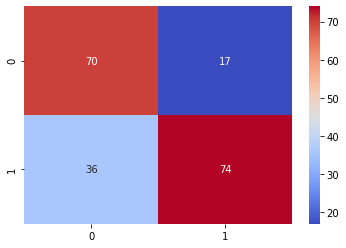

In [81]:
from sklearn.metrics import confusion_matrix

sns.heatmap(cfNew,annot=True, fmt='2g',cmap='coolwarm')

plt.show()

## Comparing the result of the shortlisted Models using visualization

In [ ]:
# Random Forest (Rating 1-10)
Accuracy:  0.7570281124497992
Precision:  0.7585374658851891
Recall:  0.7693735259665532
F1-Score:  0.7629774985518468
Cross Validation Score:  79.01557788944724
    
# K-NN  (Rating 1-10)
Accuracy:  0.8032128514056225
Precision:  0.7916589222936841
Recall:  0.8121436830604306
F1-Score:  0.793481414843633
Cross Validation Score:  79.46859296482411
    
#Logistic Regression (Quality: Good / Bad)
Accuracy:  0.7309644670050761
Precision:  0.7367820858386895
Recall:  0.738662486938349
F1-Score:  0.7308535044982343
Cross Validation Score:  73.99221032132425

In [322]:
ScoreCard= {'RandomForest': {'Accuracy':0.76,'Precision':0.76,'Recall':0.77,'F1-Score':0.76,'Cross Validation Score':0.79},
          'K-NN':{'Accuracy':0.80,'Precision':0.79,'Recall':0.81,'F1-Score':0.79,'Cross Validation Score':0.79},
          'Logistic Regression':{'Accuracy':0.73,'Precision':0.74,'Recall':0.74,'F1-Score':0.73,'Cross Validation Score':0.73}
          }

In [367]:
user_ids = []
frames = []

for user_id, d in ScoreCard.items():
    user_ids.append(user_id)
    frames.append(pd.DataFrame.from_dict(d, orient='index'))

pd.concat(frames, keys=user_ids)

0
RandomForest        Accuracy                0.76
                    Precision               0.76
                    Recall                  0.77
                    F1-Score                0.76
                    Cross Validation Score  0.79
K-NN                Accuracy                0.80
                    Precision               0.79
                    Recall                  0.81
                    F1-Score                0.79
                    Cross Validation Score  0.79
Logistic Regression Accuracy                0.73
                    Precision               0.74
                    Recall                  0.74
                    F1-Score                0.73
                    Cross Validation Score  0.73

In [371]:
Finaldf=pd.concat(frames, keys=user_ids)

In [410]:
Finaldf.to_csv('Scorecard.csv')


In [416]:
ScorecardDF=pd.read_csv('Scorecard1.csv')
ScorecardDF

,ML Algorithm,Metrics,Values
0,RandomForest,Accuracy,0.76
1,RandomForest,Precision,0.76
2,RandomForest,Recall,0.77
3,RandomForest,F1-Score,0.76
4,RandomForest,Cross Validation Score,0.79
5,K-NN,Accuracy,0.80
6,K-NN,Precision,0.79
7,K-NN,Recall,0.81
8,K-NN,F1-Score,0.79
9,K-NN,Cross Validation Score,0.79


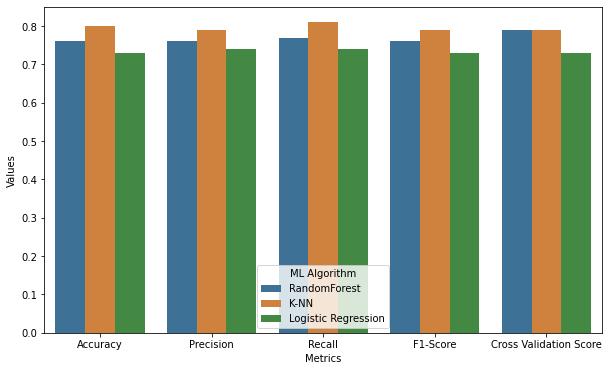

In [433]:
import seaborn as sns

plt.subplots(figsize=(10,6))
sns.barplot(x=ScorecardDF['Metrics'], y=ScorecardDF['Values'],data=ScorecardDF,hue=ScorecardDF['ML Algorithm'],saturation=0.6)



### Since the K-NN rating prediction gives better scores than Logistic Regression Quality prediction as well as Random Forest Rating Prediction, we will go ahead
### with the K-Nearest Neighbour rating prediction of Red Wine